# Regression
In this section, we will try to solve the problem of **Regression**. In our first step, we will atack the problem from the analytical view.

### Generate Synthetic Data

We will use rather simple line of $ y = 3x + 8 $ with noise of $ \epsilon = 5 $ to generate test and train data:

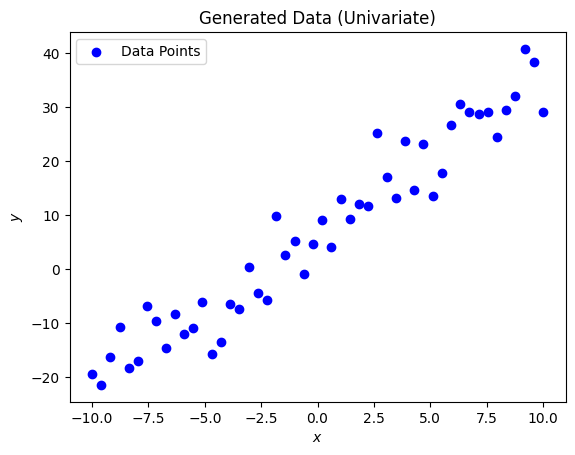

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n_samples=50, noise=5.0):
    np.random.seed(42)
    X = np.linspace(-10, 10, n_samples)
    # Ground truth line: y = 3x + 8
    true_slope = 3
    true_intercept = 8
    noise = np.random.randn(n_samples) * noise
    y = true_slope * X + true_intercept + noise
    return X, y

# plot
X, y = generate_data(n_samples=50, noise=5.0)
plt.scatter(X, y, color='blue', label='Data Points')
plt.title("Generated Data (Univariate)")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

## Linear Regression: Analytical Solution

### Implement the Closed-Form Solution
In the analytical approach, we directly compute the optimal parameters using the normal equation:

$$
\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

This method works perfectly for small datasets, but can become computationally expensive for large-scale problems.


In [3]:
# Hypothesis: h_w(x) = w_0 + w_1 * x_1
def h_w(x, w):
    return w[0] + w[1] * x  # equivalent to w_0 + w_1 * x

# Linear Regression using closed-form solution
def linear_regression_closed_form(X, y):
    # Adding bias term (x_0 = 1) to input vector X
    X_b = np.c_[np.ones((len(X), 1)), X]  # X_b is now the full input vector with bias term
    # Closed-form solution: w = (X^T * X)^-1 * X^T * y
    w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return w

# Get parameter vector w
w = linear_regression_closed_form(X, y)
print(f"Parameters (w): ")
print(f"w_1 = {w[1]:.2f}, w_0 = {w[0]:.2f}")


Parameters (w): 
w_1 = 2.86, w_0 = 6.87


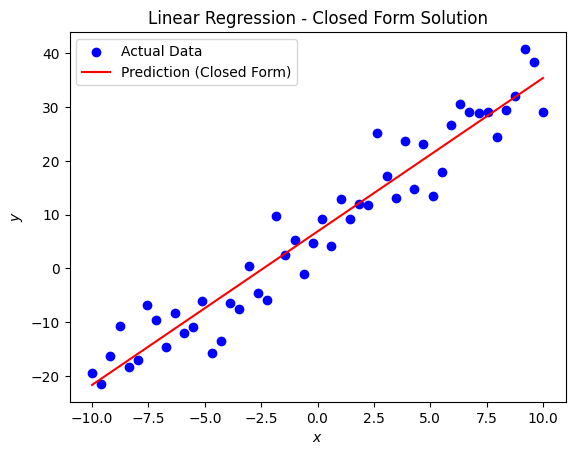

In [4]:
y_pred = h_w(X, w)

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Prediction (Closed Form)')
plt.title("Linear Regression - Closed Form Solution")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

## Polynomial Regression: Analytical Solution



### Implement Polynomial Regression
Linear models are simple, but they fail to capture nonlinear relationships. Linear regression can be extended to model nonlinear relationships by introducing polynomial terms.

$$
y = w_0 + w_1x + w_2x^2 + ... + w_mx^m
$$

In [36]:
# Function to generate polynomial features (input matrix X')
def polynomial_features(X, degree):
    X_poly = np.c_[np.ones(len(X))]
    for i in range(1, degree + 1):
        X_poly = np.c_[X_poly, X**i]
    return X_poly

def polynomial_regression(X, y, degree):
    X_poly = polynomial_features(X, degree)
    w = np.linalg.pinv(X_poly).dot(y)
    return w

m = 9 # Degree of the polynomial regression
w_poly = polynomial_regression(X, y, m)  # Parameter vector w

print(f"Parameters (w) for Degree {m}: {w_poly}")

Parameters (w) for Degree 9: [ 6.93311721e+00  2.94214674e+00 -1.61440031e-01  8.29987299e-02
  4.44988749e-03 -4.25261572e-03 -8.44754195e-06  6.52283521e-05
 -2.10575496e-07 -3.13878803e-07]


### Visualize the Polynomial Fit

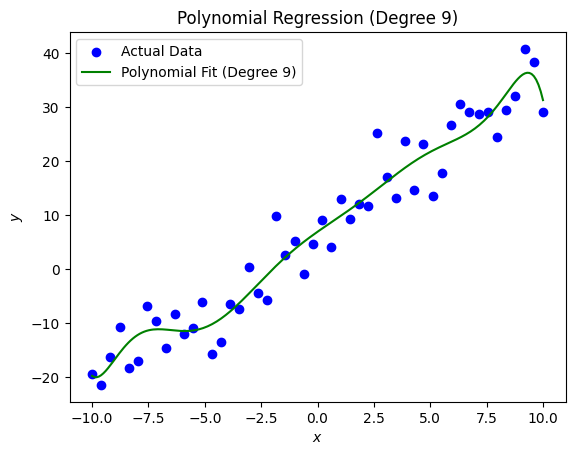

In [40]:
X_fit = np.linspace(X.min(), X.max(), 200)
X_fit_poly = polynomial_features(X_fit, m)
y_poly_pred = X_fit_poly.dot(w_poly)  # h_w(x) = X' * w

# Plot the actual data and the polynomial fit
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_fit, y_poly_pred, color='green', label=f'Polynomial Fit (Degree {m})')
plt.title(f"Polynomial Regression (Degree {m})")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

## Visualizing $E_{rms}$
The **Root Mean Squared Error (RMSE)** measures the average magnitude of prediction errors and helps us understand how well our model fits the data.
We will analyze how the polynomial degree affects both training and testing error.
We could visualize the $E_{rms}$ better if we split generated data into train and test datasets

⭐ Increasing model complexity typically reduces training error but may increase testing error (overfitting).



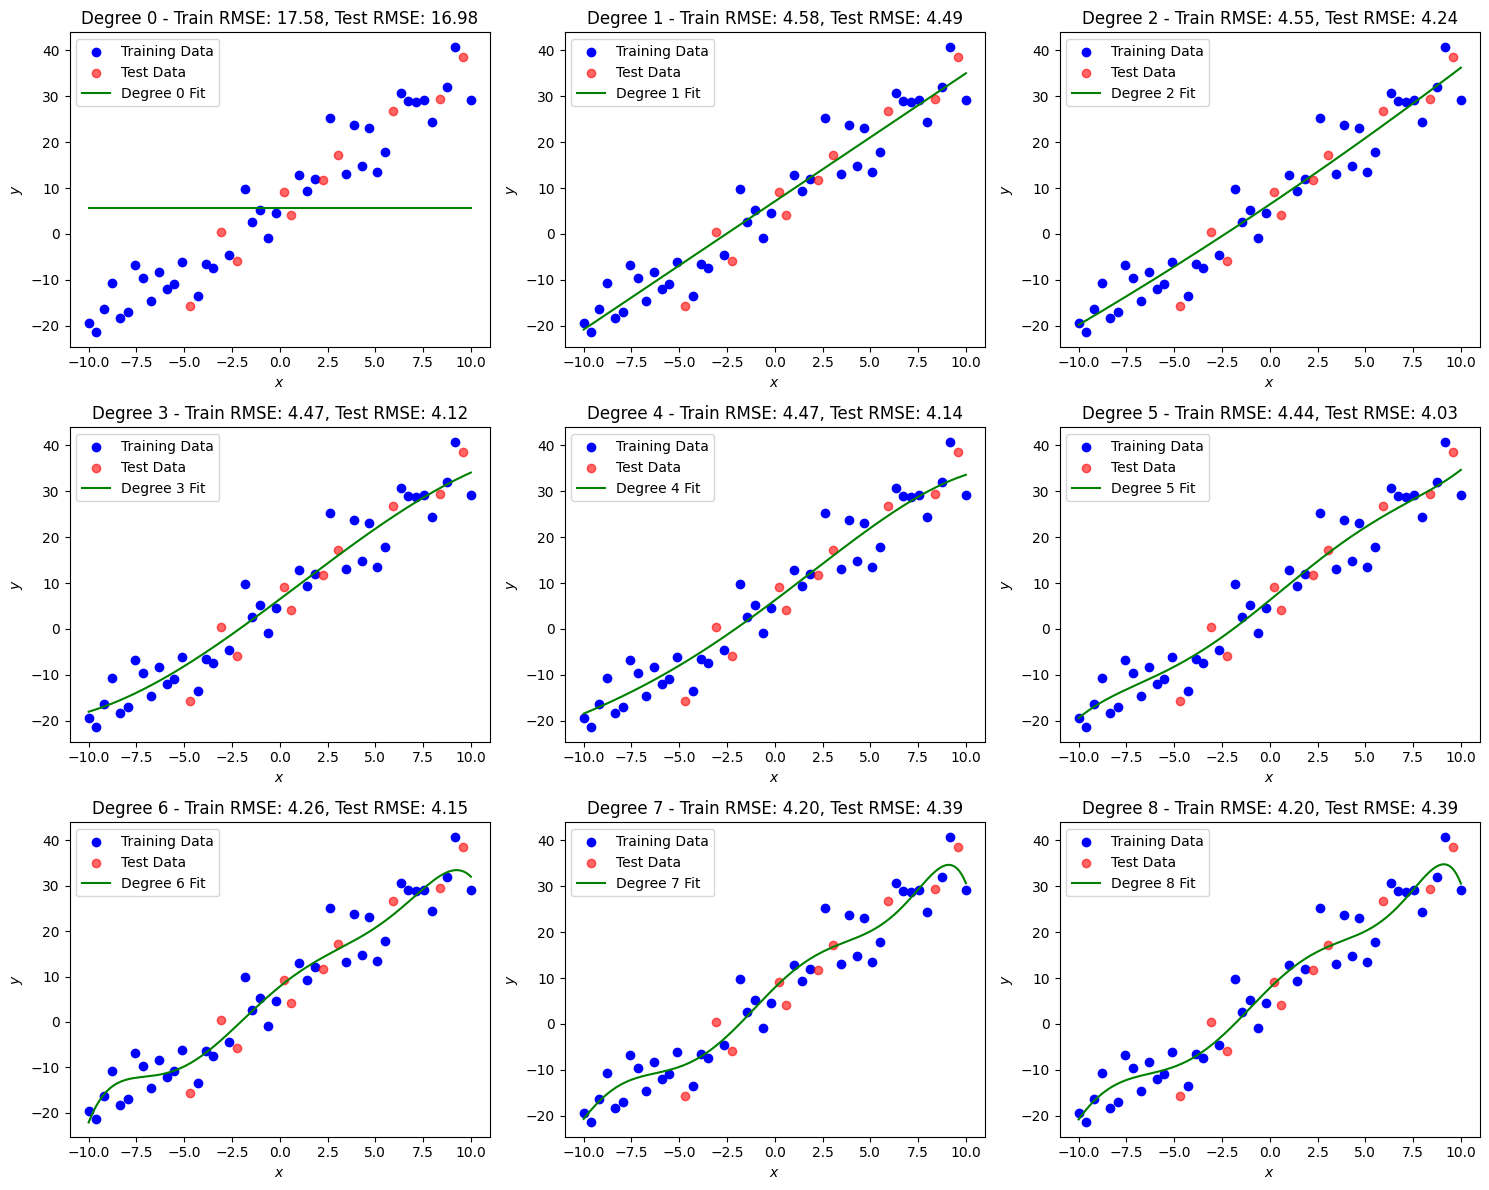

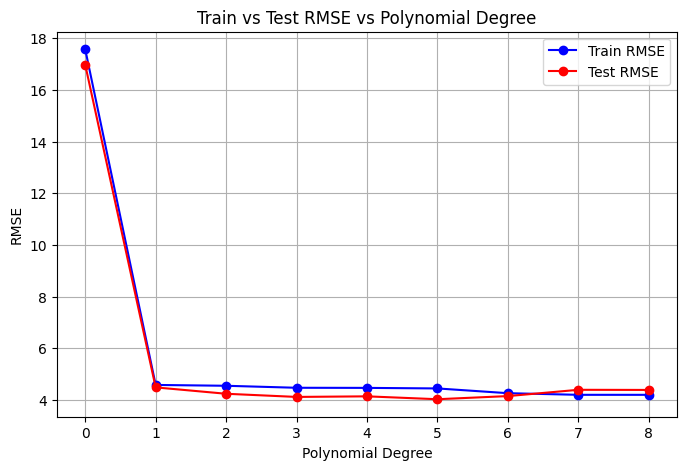

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define Root Mean Square Error compute function
def compute_rms_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))


# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = range(0, 9)
train_rms_errors = []
test_rms_errors = []

# Create subplots for 9 polynomial degrees (3 rows x 3 columns)
fig, axs = plt.subplots(3, 3, figsize=(15, 12))
axs = axs.flatten()  # Flatten to make it easier to index

for i, d in enumerate(degrees):
    # Train the model
    w_poly = polynomial_regression(X_train, y_train, d)

    # Make predictions on training set
    X_train_poly = polynomial_features(X_train, d)
    y_train_pred = X_train_poly.dot(w_poly)

    # Make predictions on test set
    X_test_poly = polynomial_features(X_test, d)
    y_test_pred = X_test_poly.dot(w_poly)

    # Compute RMSE
    train_rms_error = compute_rms_error(y_train, y_train_pred)
    test_rms_error = compute_rms_error(y_test, y_test_pred)

    # Store RMSE values
    train_rms_errors.append(train_rms_error)
    test_rms_errors.append(test_rms_error)

    # Plot in the corresponding subplot
    ax = axs[i]
    ax.scatter(X_train, y_train, color='blue', label="Training Data")
    ax.scatter(X_test, y_test, color='red', label="Test Data", alpha=0.6)
    X_fit = np.linspace(X.min(), X.max(), 200)
    X_fit_poly = polynomial_features(X_fit, d)
    y_fit_pred = X_fit_poly.dot(w_poly)
    ax.plot(X_fit, y_fit_pred, label=f"Degree {d} Fit", color='green')
    ax.set_title(f"Degree {d} - Train RMSE: {train_rms_error:.2f}, Test RMSE: {test_rms_error:.2f}")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.legend()

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

# Create a new figure for RMSE comparison (centered in 4th row visually)
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(degrees, train_rms_errors, marker='o', linestyle='-', color='blue', label='Train RMSE')
ax.plot(degrees, test_rms_errors, marker='o', linestyle='-', color='red', label='Test RMSE')
ax.set_title("Train vs Test RMSE vs Polynomial Degree")
ax.set_xlabel("Polynomial Degree")
ax.set_ylabel("RMSE")
ax.set_xticks(degrees)
ax.grid(True)
ax.legend()

plt.show()

As you can see from the RMSE plot above, by increasing the degree polynomial, the training error never increases **(Why ?)**. However; testing error can increase.

## Gradient Descent:
In this section, we will use the popular iterative method called **Gradient Descent** to solve the regression problem.

Assuming we need to find $ w_0\ and\ w_1 $ in the problem of linear regression, update rule using gradinet descent will be:
$$
\begin{array}{l}
w_0 \leftarrow w_0 - \eta \frac{\partial J}{\partial w_0} = w_0 - \eta \sum_{i=1}^{m} (h_w(x^{(i)}) - y^{(i)}) \\
w_1 \leftarrow w_1 - \eta \frac{\partial J}{\partial w_1} = w_1 - \eta \sum_{i=1}^{m} (h_w(x^{(i)}) - y^{(i)}) (x^{(i)}) \\
\end{array}
$$

In which $ \eta $ is the learning rate. To overcome the problem of overflow, assume cost function is $ J(\mathbf{w}) = \frac{SSE}{training \ \ size} $

### Implementing GD for linear regression

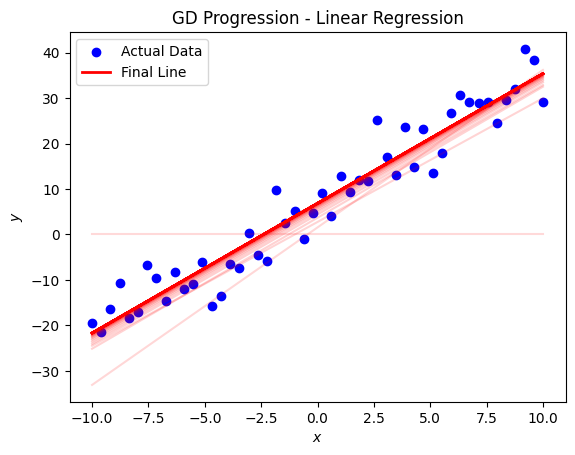

In [42]:
# SSE cost function
def cost_function(X, y, w):
    return np.sum((h_w(X, w) - y)**2) / len(X)

# Gradient descent
def gradient_descent(X, y, w, alpha, num_iters):
    m = len(X)
    cost_history = []
    w_history = [w.copy()]

    for i in range(num_iters):
        # updates
        gradient_w0 = np.sum(h_w(X, w) - y) / m
        gradient_w1 = np.sum((h_w(X, w) - y) * X) / m
        w[0] -= alpha * gradient_w0
        w[1] -= alpha * gradient_w1

        cost_history.append(cost_function(X, y, w))
        w_history.append(w.copy())  # Store a copy of w, not the reference

    return w, cost_history, w_history

X, y = generate_data(n_samples=50, noise=5.0)
w_initial = [0, 0]  # Start with w0 = 0, w1 = 0
eta = 0.05  # Learning rate
num_iters = 500

# Run Gradient Descent
w_final, cost_history, w_history = gradient_descent(X, y, w_initial, eta, num_iters)

# Visualize cost function (log of J(w))
w0_vals = np.linspace(-10, 20, 100)
w1_vals = np.linspace(-1, 5, 100)
J_vals = np.zeros((len(w0_vals), len(w1_vals)))

for i in range(len(w0_vals)):
    for j in range(len(w1_vals)):
        w = [w0_vals[i], w1_vals[j]]
        J_vals[i, j] = cost_function(X, y, w)

# Plot GD Progression (without labels for lines, different alphas)
plt.scatter(X, y, color='blue', label='Actual Data')

# Plot lines for every 50th step with increasing alpha
for idx, w in enumerate(w_history[::num_iters // 100]):
    alpha = 0.15 + 0.85*(idx) / 100  # Gradually increase alpha for each line
    plt.plot(X, h_w(X, w), color='red', alpha=alpha)

# Final line in bold
plt.plot(X, h_w(X, w_final), color='red', lw=2, label='Final Line')

plt.title("GD Progression - Linear Regression")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

As you can see from the lines above, we first started by a neutral hypothesis which was a simple line $ y = 0 $. The update at each iteration tries to minimize cost function thus improving weights. As you can see, the final line after 500 iterations is the line best describing datapoints. **But how can we be sure that cost function is optimizable ?**

### Plotting cost function
To get a better sense of SSE cost function, let's visualize it for univariate linear regression discussed:

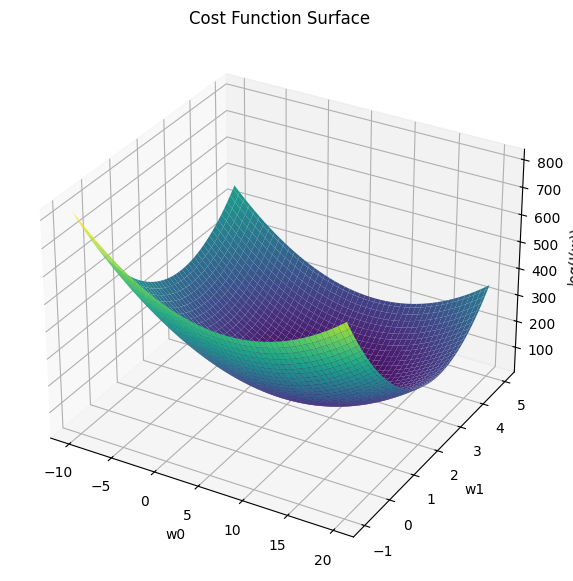

In [43]:
# 3D Plot of J(w)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
W0, W1 = np.meshgrid(w0_vals, w1_vals)
ax.plot_surface(W0, W1, J_vals.T, cmap='viridis')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('log(J(w))')
plt.title("Cost Function Surface")
plt.show()

The plot above can be somewhat confusing. Let us visualize $ log J(\mathbf{w}) $ instead:

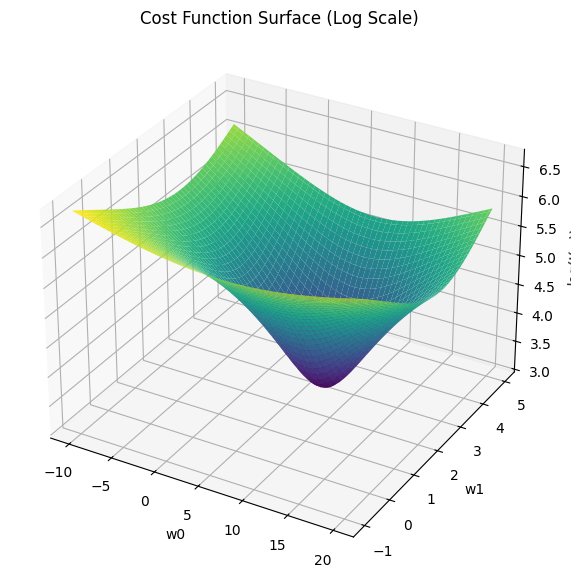

In [44]:
# 3D Plot of log J(w)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
W0, W1 = np.meshgrid(w0_vals, w1_vals)
ax.plot_surface(W0, W1, np.log(J_vals.T), cmap='viridis')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('log(J(w))')
plt.title("Cost Function Surface (Log Scale)")
plt.show()

Gradient descent tries to reach minimum point of the plot above in each step. But are we actually reaching our goal ? Let's visualize it:

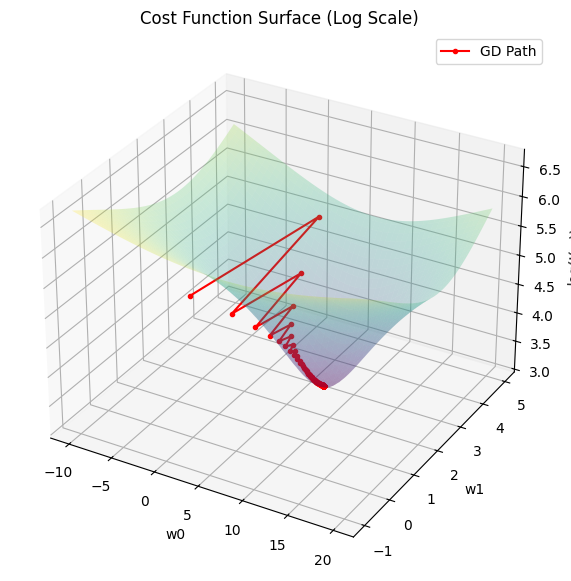

In [45]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
W0, W1 = np.meshgrid(w0_vals, w1_vals)
ax.plot_surface(W0, W1, np.log(J_vals.T), cmap='viridis', alpha=0.25)
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('log(J(w))')
plt.title("Cost Function Surface (Log Scale)")

# Plot the points on the 3D surface for each GD iteration
w_history_array = np.array(w_history)  # Convert list to array for easier slicing
w0_history = w_history_array[:, 0]
w1_history = w_history_array[:, 1]
cost_history_log = np.log(np.array(cost_history))  # Log of the cost history

# Plot the path of gradient descent in 3D
ax.plot(w0_history[:num_iters], w1_history[:num_iters], cost_history_log, marker='o', color='r', label='GD Path', markersize=3)

plt.legend()
plt.show()

As shown in the plot above, GD is trying to reach optimal point at each step.

### Effect of learning rate ($ \eta $)
Choosing $ \eta $ could be tricky.

**Large learning rates** can lead to divergence.

**Small learning rates** on the other hand could slow down the convergence by requiring more iterations.

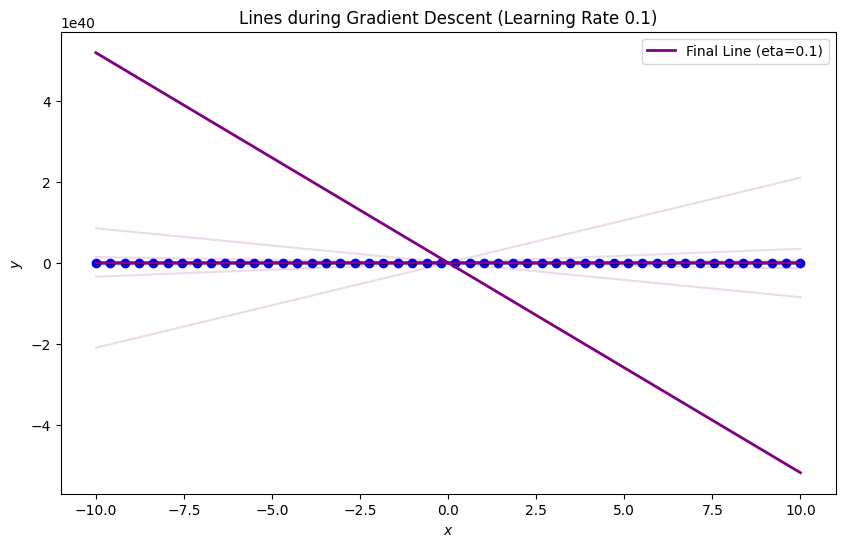

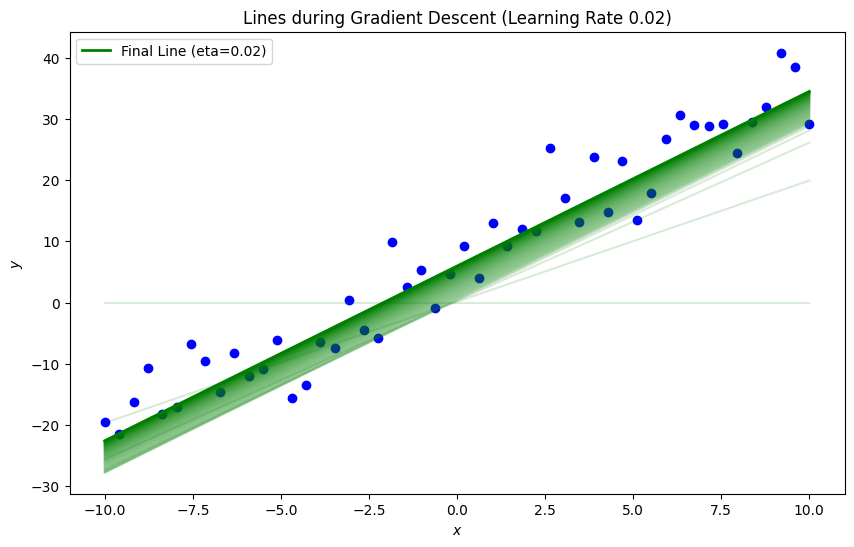

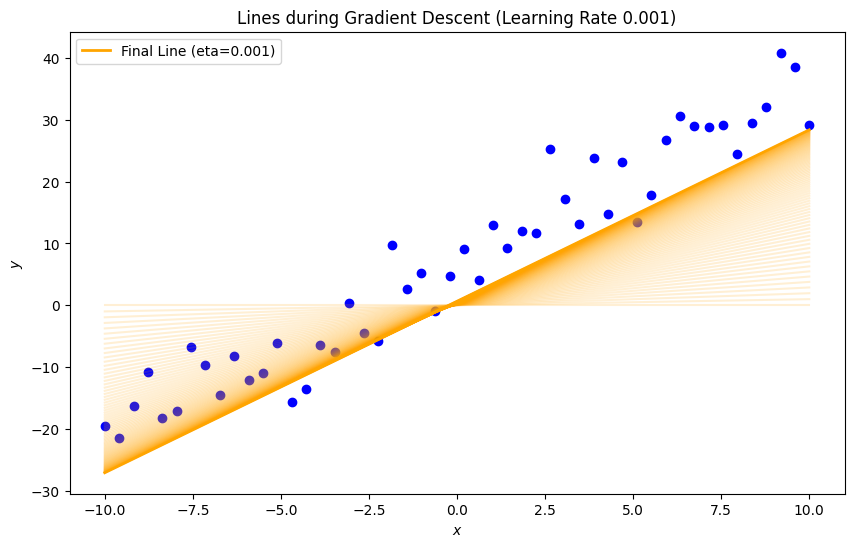

In [46]:
# Define different learning rates to test
learning_rates = [0.1, 0.02, 0.001]

# Number of iterations for gradient descent
num_iters = 100

# Initial weights (w0 and w1)
w_initial = [0, 0]

# Colors for plotting each learning rate's results
colors = ['purple', 'green', 'orange']

# Create a grid of possible w0 and w1 values for visualizing the cost function
w0_vals = np.linspace(-10, 20, 100)
w1_vals = np.linspace(-1, 5, 100)
J_vals = np.zeros((len(w0_vals), len(w1_vals)))

# Compute the cost function for each pair of (w0, w1)
for i in range(len(w0_vals)):
    for j in range(len(w1_vals)):
        w = [w0_vals[i], w1_vals[j]]
        J_vals[i, j] = cost_function(X, y, w)

# To store the cost history for each learning rate
cost_histories = []

# Perform Gradient Descent for each learning rate (eta)
for idx, eta in enumerate(learning_rates):

    # Run gradient descent starting from the same initial weights
    w_final, cost_history, w_history = gradient_descent(X, y, w_initial.copy(), eta, num_iters)
    cost_histories.append(cost_history)

    # Plot the regression lines as they evolve during gradient descent
    plt.figure(figsize=(10, 6))

    # Plot intermediate lines (100 samples across the iterations)
    for step_idx, w in enumerate(w_history[::num_iters // 100]):
        # Set transparency for each line
        alpha_val = 0.15 + 0.85*(idx) / 100
        plt.plot(X, h_w(X, w), color=colors[idx], alpha=alpha_val)

    plt.plot(X, h_w(X, w_final), lw=2, label=f'Final Line (eta={eta})', color=colors[idx])
    plt.title(f"Lines during Gradient Descent (Learning Rate {eta})")
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.legend()
    plt.scatter(X, y, color='blue', label='Actual Data')
    plt.show()

As shown in the plots above, choosing a large learning rate leads to divergence. In this example, the update rule keeps making weights larger and larger and the weights will never converge. Choosing a small learning rate on the other hand, leads to slow convergence. In this example, learning $ w_0 $ is happening at a slow time because the update rule is being changed almost minimially !

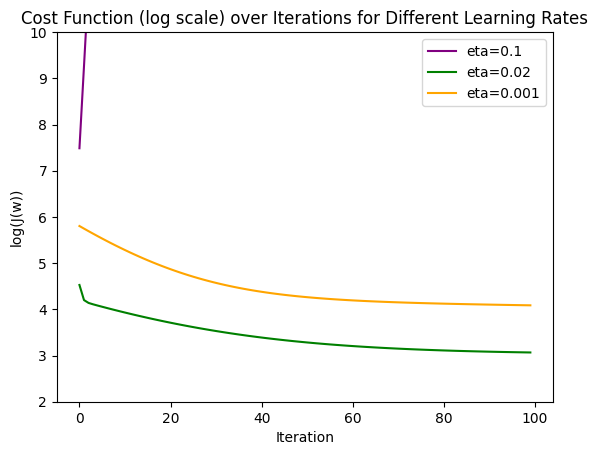

In [47]:
plt.title("Cost Function (log scale) over Iterations for Different Learning Rates")
plt.xlabel("Iteration")
plt.ylabel("log(J(w))")
for idx in range(len(cost_histories)):
  plt.plot(np.log(cost_histories[idx]), label=f'eta={learning_rates[idx]}', color=colors[idx])
plt.ylim(bottom=2, top=10)
plt.legend()
plt.show()

## Regularization: Ridge and Lasso Regression
In this section, we will try to visualize the effect of regularization using **L1 norm (Lasso regression)** and **L2 norm (Ridge regression)**.
 Let us have a small number of datapoints and try to fit a complex model to it:

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

def generate_data(n=100, noise=10.0):
    np.random.seed(42)
    X = np.random.uniform(-10, 10, n)
    y = X**2 - 2 * X + np.random.randn(n) * noise  # x**2 - 2*x + noise
    return X, y

X, y = generate_data(n=15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


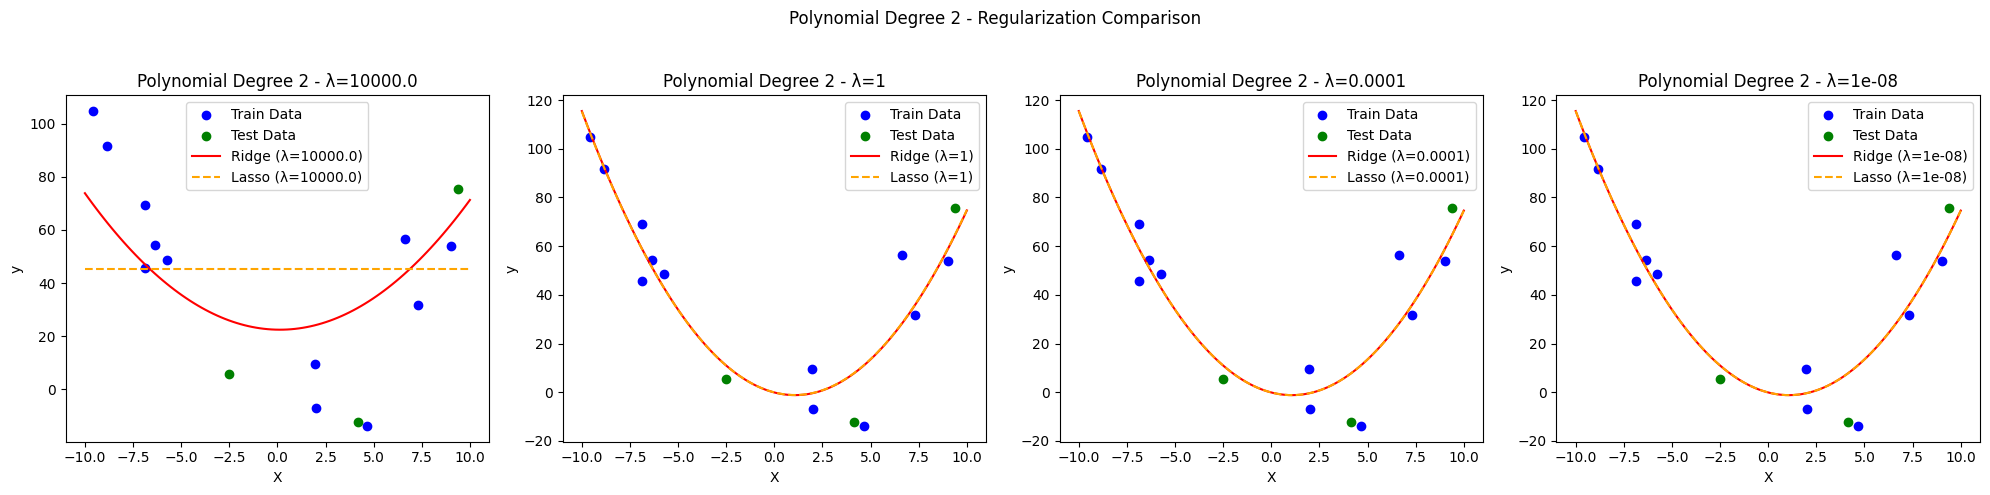

/Users/keivanjamali/miniconda3/envs/dl-python/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.735e+00, tolerance: 1.426e+00
  model = cd_fast.enet_coordinate_descent(
/Users/keivanjamali/miniconda3/envs/dl-python/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.588e+02, tolerance: 1.426e+00
  model = cd_fast.enet_coordinate_descent(
/Users/keivanjamali/miniconda3/envs/dl-python/lib/python3.11/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.30953e-20): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/

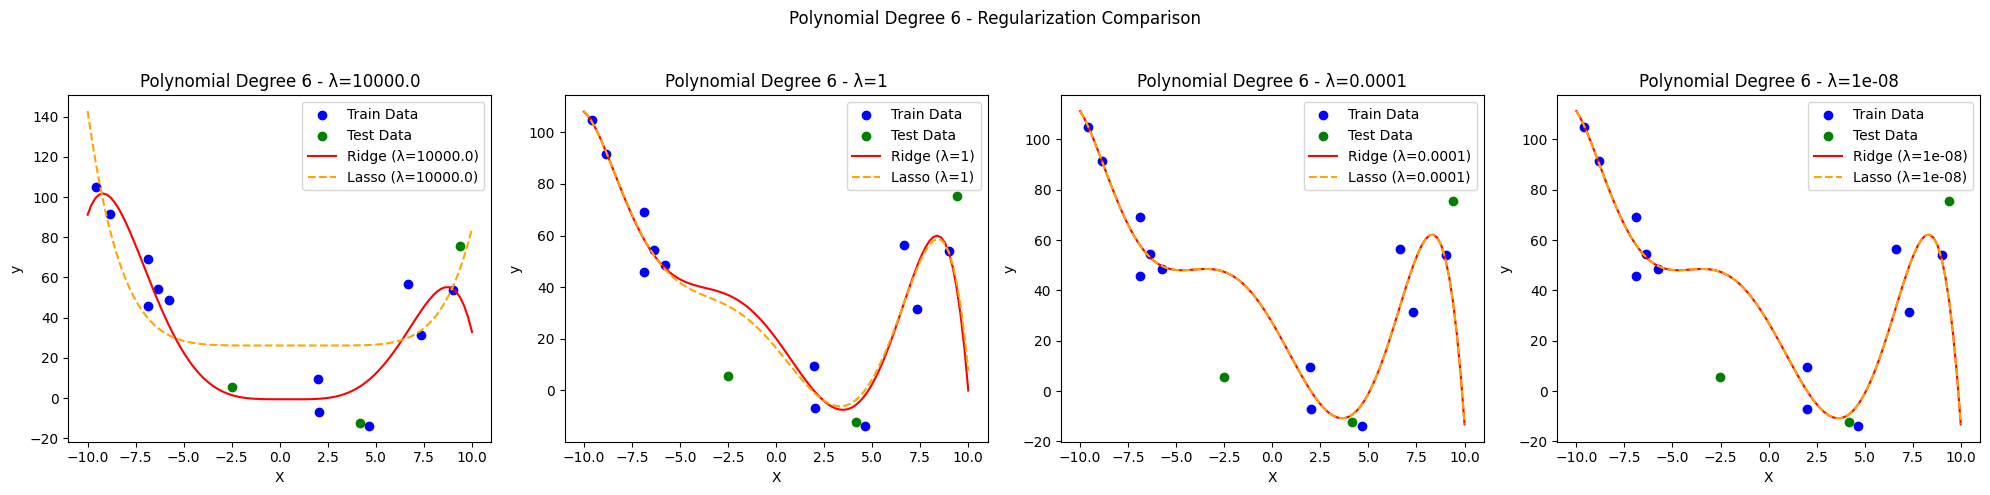

/Users/keivanjamali/miniconda3/envs/dl-python/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.824e+02, tolerance: 1.426e+00
  model = cd_fast.enet_coordinate_descent(
/Users/keivanjamali/miniconda3/envs/dl-python/lib/python3.11/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.58344e-20): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/Users/keivanjamali/miniconda3/envs/dl-python/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.461e+02, tolerance: 1.426e+00
  model = cd_fast.enet_coordinate_descent(
/

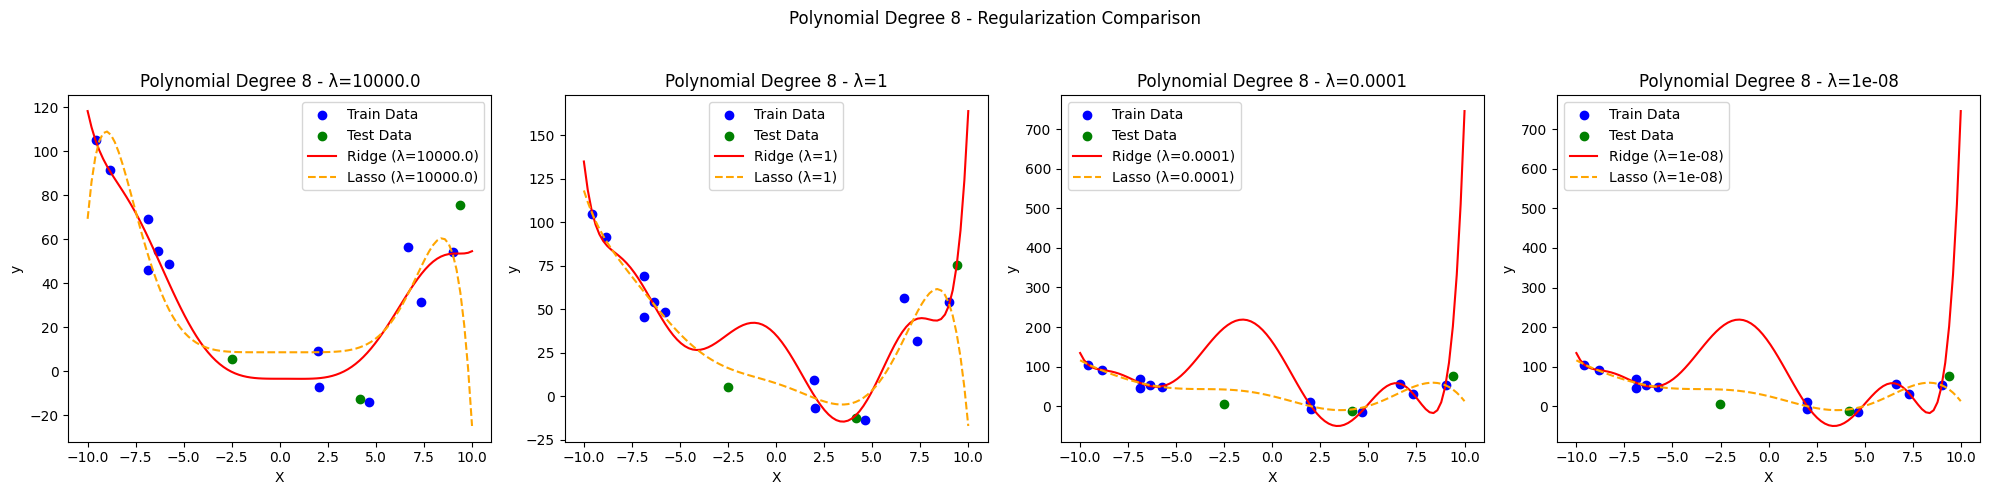

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso

degrees = [2, 6, 8]
lambdas = [1e4, 1, 1e-4, 1e-8]

ridge_rmse_train = np.zeros((len(degrees), len(lambdas)))
ridge_rmse_test = np.zeros((len(degrees), len(lambdas)))
lasso_rmse_train = np.zeros((len(degrees), len(lambdas)))
lasso_rmse_test = np.zeros((len(degrees), len(lambdas)))

for degree_idx, degree in enumerate(degrees):
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # Create a 1x4 grid of subplots
    for lambda_idx, lambda_val in enumerate(lambdas):
        poly_features = PolynomialFeatures(degree=degree)
        X_train_poly = poly_features.fit_transform(X_train[:, np.newaxis])
        X_test_poly = poly_features.transform(X_test[:, np.newaxis])

        # Ridge Regression using scikit-learn
        ridge_model = Ridge(alpha=lambda_val)
        ridge_model.fit(X_train_poly, y_train)
        y_train_pred_ridge = ridge_model.predict(X_train_poly)
        y_test_pred_ridge = ridge_model.predict(X_test_poly)

        # Lasso Regression using scikit-learn
        lasso_model = Lasso(alpha=lambda_val, max_iter=10000)
        lasso_model.fit(X_train_poly, y_train)
        y_train_pred_lasso = lasso_model.predict(X_train_poly)
        y_test_pred_lasso = lasso_model.predict(X_test_poly)

        ridge_rmse_train[degree_idx, lambda_idx] = compute_rms_error(y_train, y_train_pred_ridge)
        ridge_rmse_test[degree_idx, lambda_idx] = compute_rms_error(y_test, y_test_pred_ridge)
        lasso_rmse_train[degree_idx, lambda_idx] = compute_rms_error(y_train, y_train_pred_lasso)
        lasso_rmse_test[degree_idx, lambda_idx] = compute_rms_error(y_test, y_test_pred_lasso)

        # Plot the fitted curves for both Ridge and Lasso
        X_plot = np.linspace(-10, 10, 100)
        X_plot_poly = poly_features.transform(X_plot[:, np.newaxis])

        y_plot_ridge = ridge_model.predict(X_plot_poly)
        y_plot_lasso = lasso_model.predict(X_plot_poly)

        ax = axs[lambda_idx]
        ax.scatter(X_train, y_train, color='blue', label='Train Data')
        ax.scatter(X_test, y_test, color='green', label='Test Data')
        ax.plot(X_plot, y_plot_ridge, color='red', label=f'Ridge (λ={lambda_val})')
        ax.plot(X_plot, y_plot_lasso, color='orange', linestyle='--', label=f'Lasso (λ={lambda_val})')
        ax.set_title(f'Polynomial Degree {degree} - λ={lambda_val}')
        ax.set_xlabel('X')
        ax.set_ylabel('y')
        ax.legend()

    plt.suptitle(f'Polynomial Degree {degree} - Regularization Comparison')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


In [1]:
# plot RMSE
plt.figure(figsize=(10, 6))

for degree_idx, degree in enumerate(degrees):
    plt.plot(lambdas, ridge_rmse_test[degree_idx], marker='x', label=f'Ridge - Degree {degree}')
plt.xscale('log')
plt.xlabel('Regularization Parameter (λ)')
plt.ylabel('RMSE')
plt.title('RMSE for Ridge at Different Polynomial Degrees')
plt.legend()
plt.show()

for degree_idx, degree in enumerate(degrees):
  plt.plot(lambdas, lasso_rmse_test[degree_idx], marker='x', label=f'Lasso - Degree {degree}')

plt.xscale('log')
plt.xlabel('Regularization Parameter (λ)')
plt.ylabel('RMSE')
plt.title('RMSE for Lasso at Different Polynomial Degrees')
plt.legend()
plt.show()

NameError: name 'plt' is not defined